In [1]:
import pandas as pd


In [2]:
df = pd.read_excel("E:\个人资料\数据资料\数据.xlsx",sheet_name="phonetime",headed=0,usecols= [0,1,2,3,4])

In [3]:
df.columns=['日期', '王者', '知乎', '微信', '微博']
dfi=df.drop(df.index[[0,1]],axis=0)
dfi.fillna(0,inplace=True)

#dfi.reset_index(drop=True)
dfi.set_index('日期',inplace=True)
#dfi.reset_index(drop=True,inplace=True)


In [4]:
dfi2=dfi.iloc[:22]

In [5]:
dfi2.columns
dfi2.values[0]

array([0.88333333, 0.06666667, 0.13333333, 0.        ])

In [6]:
dfi2.head()

,王者,知乎,微信,微博
日期,,,,
2020-03-01,0.883333,0.066667,0.133333,0.000000
2020-02-29,3.150000,0.000000,0.966667,1.133333
2020-02-28,2.450000,1.216667,0.383333,0.666667
2020-02-27,3.100000,0.400000,0.266667,0.400000
2020-02-26,2.966667,0.700000,0.600000,0.683333


In [7]:
dfi2.index

DatetimeIndex(['2020-03-01', '2020-02-29', '2020-02-28', '2020-02-27',
               '2020-02-26', '2020-02-25', '2020-02-24', '2020-02-23',
               '2020-02-22', '2020-02-21', '2020-02-20', '2020-02-19',
               '2020-02-18', '2020-02-17', '2020-02-16', '2020-02-15',
               '2020-02-14', '2020-02-13', '2020-02-12', '2020-02-11',
               '2020-02-10', '2020-02-09'],
              dtype='datetime64[ns]', name='日期', freq=None)

In [8]:
dfi2["王者"].sum()

67.58333333333334

In [9]:
dfi2['微博'].sum()

12.98333333333333

In [10]:
#dfi2['王者'].astype("int")

In [11]:
dfi2['王者'].dtype

dtype('float64')

In [12]:
'''
lists = ['王者','知乎','微信','微博']
a=[]
for i in lists:
    a = dfi2[i].sum()
    print (i,a)  
'''

"\nlists = ['王者','知乎','微信','微博']\na=[]\nfor i in lists:\n    a = dfi2[i].sum()\n    print (i,a)  \n"

In [13]:
lists = ['王者','知乎','微信','微博']
def sums(lists):
    for i in lists:
        yield dfi2[i].sum()

In [14]:
list(sums(lists))

[67.58333333333334, 10.316666666666665, 11.783333333333333, 12.98333333333333]

In [15]:
report = pd.Series(list(sums(lists)),index=[lists])

In [16]:
report

王者    67.583333
知乎    10.316667
微信    11.783333
微博    12.983333
dtype: float64

In [17]:
'''
lists = ['王者','知乎','微信','微博']
def sums2(lists):
    for i in lists:
        yield dfi2[i].sum()
report = pd.Series(list(sums2(lists)),index=[lists])
report
'''

"\nlists = ['王者','知乎','微信','微博']\ndef sums2(lists):\n    for i in lists:\n        yield dfi2[i].sum()\nreport = pd.Series(list(sums2(lists)),index=[lists])\nreport\n"

dfi2["col_sum"]=round(dfi2.apply(lambda x: x.sum(),axis=1),2)

#df.loc['Row_sum'] = df.apply(lambda x: x.sum())
#df['Col_sum'] = df.apply(lambda x: x.sum(), axis=1)

#dfi.loc['rox_sum']=dfi["王者"].apply(lambda x : x.sum())
#dfi["col_sum"]=dfi.apply(lambda x: x.sum(),axis=1)
#https://www.cnblogs.com/wuzhiblog/p/python_new_row_or_col.html

dfi2.loc["row_sum"]=round(dfi2.apply(lambda x:x.sum()),2)

dfi2.loc["row_mean"]=round(dfi2.loc['row_sum']/(dfi2.count()-1),2)

In [18]:
dfi2

,王者,知乎,微信,微博
日期,,,,
2020-03-01,0.883333,0.066667,0.133333,0.000000
2020-02-29,3.150000,0.000000,0.966667,1.133333
2020-02-28,2.450000,1.216667,0.383333,0.666667
2020-02-27,3.100000,0.400000,0.266667,0.400000
2020-02-26,2.966667,0.700000,0.600000,0.683333
2020-02-25,2.166667,0.316667,0.316667,0.750000
2020-02-24,5.483333,0.083333,0.266667,0.300000
2020-02-23,4.600000,0.000000,0.216667,0.633333
2020-02-22,3.850000,0.383333,0.283333,0.300000


In [19]:
dfi2.count()

王者    22
知乎    22
微信    22
微博    22
dtype: int64

In [20]:
dfi2.mean()

王者    3.071970
知乎    0.468939
微信    0.535606
微博    0.590152
dtype: float64

In [21]:
import matplotlib.pyplot as plt
'''
%matplotlib inline
plt.rcParams["font.sans-serif"] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figue_format = 'svg'
'''

'\n%matplotlib inline\nplt.rcParams["font.sans-serif"] = \'SimHei\'\nplt.rcParams[\'axes.unicode_minus\'] = False\n%config InlineBackend.figue_format = \'svg\'\n'

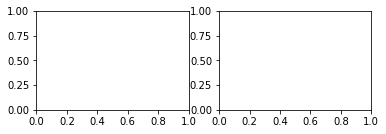

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

In [23]:
dfi2["王者"]

日期
2020-03-01    0.883333
2020-02-29    3.150000
2020-02-28    2.450000
2020-02-27    3.100000
2020-02-26    2.966667
2020-02-25    2.166667
2020-02-24    5.483333
2020-02-23    4.600000
2020-02-22    3.850000
2020-02-21    3.616667
2020-02-20    5.550000
2020-02-19    4.383333
2020-02-18    3.850000
2020-02-17    2.950000
2020-02-16    4.483333
2020-02-15    3.433333
2020-02-14    0.666667
2020-02-13    2.500000
2020-02-12    2.850000
2020-02-11    1.550000
2020-02-10    1.400000
2020-02-09    1.700000
Name: 王者, dtype: float64

In [37]:
x=dfi2["王者"].values
x

array([0.88333333, 3.15      , 2.45      , 3.1       , 2.96666667,
       2.16666667, 5.48333333, 4.6       , 3.85      , 3.61666667,
       5.55      , 4.38333333, 3.85      , 2.95      , 4.48333333,
       3.43333333, 0.66666667, 2.5       , 2.85      , 1.55      ,
       1.4       , 1.7       ])

'\nx=dfi2["王者"].values\ny=dfi2.index\nfor a,b in zip(x,y):\n    plt.text(a,b,b,ha=\'center\',va=\'bottom\',fontsize=\'10\')\n数值太多，小数太多，无法显示\n'

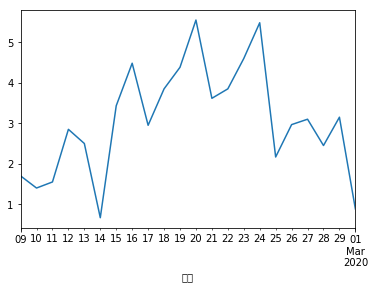

In [39]:
dfi2["王者"].plot()
'''
x=dfi2["王者"].values
y=dfi2.index
for a,b in zip(x,y):
    plt.text(a,b,b,ha='center',va='bottom',fontsize='10')
数值太多，小数太多，无法显示
'''

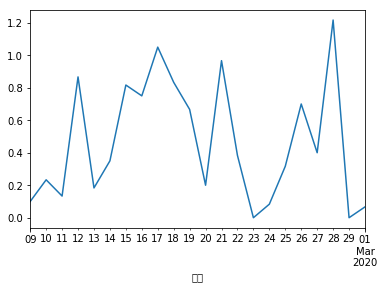

In [25]:
dfi2["知乎"].plot()

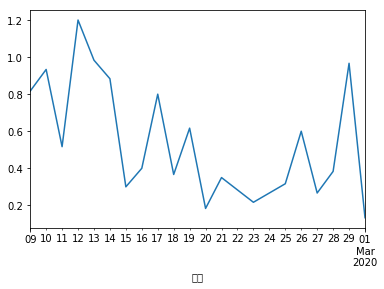

In [26]:
dfi2["微信"].plot()

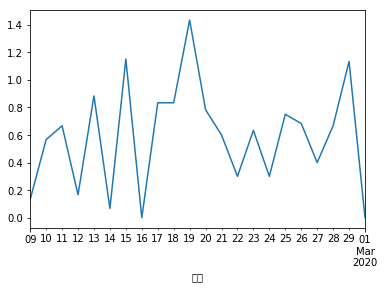

In [27]:
dfi2["微博"].plot()

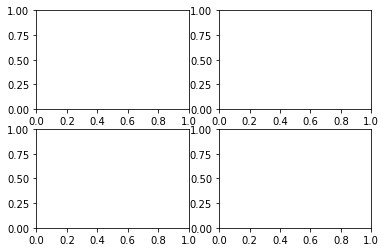

In [28]:
fig,axes = plt.subplots(2,2)

In [29]:
axes[0,0].plot(dfi2["王者"])